In [2]:
import requests
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

- 서울시 구별 주유소 가격 정보 얻기

In [12]:
driver = webdriver.Chrome('/Users/Eugene/Desktop/chromedriver')
driver.get('https://www.opinet.co.kr/user/main/mainView.do')

In [15]:
driver.find_element_by_css_selector('.ic_m1').click()   # click() | 클릭

In [18]:
region = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')
r_list = region.find_elements_by_css_selector('option')
r_names = [r.text for r in r_list]

In [17]:
restrict = r_names[0]
region = driver.find_element_by_css_selector('#SIGUNGU_NM0')
region.send_keys(restrict)

In [42]:
# 엑셀 파일 다운로드
driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()

In [56]:
for restrict in r_names :
    region = driver.find_element_by_css_selector('#SIGUNGU_NM0')
    region.send_keys(restrict)
    time.sleep(1)
    
    driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()
    time.sleep(2)

In [ ]:
driver.close()

- 구별 휘발유 가격 데이터 정리

In [6]:
import pandas as pd
from glob import glob

In [59]:
glob('/Users/Eugene/Downloads/지역*.xls')

['/Users/Eugene/Downloads/지역_위치별(주유소) (9).xls',
 '/Users/Eugene/Downloads/지역_위치별(주유소) (12).xls',
 '/Users/Eugene/Downloads/지역_위치별(주유소) (5).xls',
 '/Users/Eugene/Downloads/지역_위치별(주유소) (24).xls',
 '/Users/Eugene/Downloads/지역_위치별(주유소) (25).xls',
 '/Users/Eugene/Downloads/지역_위치별(주유소) (4).xls',
 '/Users/Eugene/Downloads/지역_위치별(주유소) (13).xls',
 '/Users/Eugene/Downloads/지역_위치별(주유소) (8).xls',
 '/Users/Eugene/Downloads/지역_위치별(주유소) (3).xls',
 '/Users/Eugene/Downloads/지역_위치별(주유소) (18).xls',
 '/Users/Eugene/Downloads/지역_위치별(주유소) (22).xls',
 '/Users/Eugene/Downloads/지역_위치별(주유소) (14).xls',
 '/Users/Eugene/Downloads/지역_위치별(주유소) (15).xls',
 '/Users/Eugene/Downloads/지역_위치별(주유소) (23).xls',
 '/Users/Eugene/Downloads/지역_위치별(주유소) (19).xls',
 '/Users/Eugene/Downloads/지역_위치별(주유소) (2).xls',
 '/Users/Eugene/Downloads/지역_위치별(주유소) (20).xls',
 '/Users/Eugene/Downloads/지역_위치별(주유소) (1).xls',
 '/Users/Eugene/Downloads/지역_위치별(주유소) (16).xls',
 '/Users/Eugene/Downloads/지역_위치별(주유소) (17).xls',
 '/Users/Eugene/Downloads/지

In [7]:
file = glob('/Users/Eugene/Downloads/지역*.xls')[0]
df = pd.read_excel(file, header = 2)
df.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,배꽃나라주유소,서울 노원구 화랑로 466 (공릉동),GS칼텍스,02-973-5172,Y,1750,1550,1350,-
1,서울특별시,삼육주유소,서울 노원구 화랑로 822 (공릉동),SK에너지,02-949-3677,Y,-,1555,1355,1050
2,서울특별시,태릉솔밭주유소,서울 노원구 노원로 49 (공릉동),S-OIL,02-976-5189,Y,1748,1565,1365,-
3,서울특별시,성북역주유소,서울 노원구 광운로 95 (월계동),GS칼텍스,02-919-8141,N,1688,1568,1368,-
4,서울특별시,월계주유소,서울 노원구 월계로 252 (월계동),GS칼텍스,02-917-7650,Y,-,1569,1357,1049


In [8]:
raw = []

for file in glob('/Users/Eugene/Downloads/지역*.xls') :
    df = pd.read_excel(file, header = 2)
    raw.append(df)

station_raw = pd.concat(raw)

In [65]:
station_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,배꽃나라주유소,서울 노원구 화랑로 466 (공릉동),GS칼텍스,02-973-5172,Y,1750,1550,1350,-
1,서울특별시,삼육주유소,서울 노원구 화랑로 822 (공릉동),SK에너지,02-949-3677,Y,-,1555,1355,1050
2,서울특별시,태릉솔밭주유소,서울 노원구 노원로 49 (공릉동),S-OIL,02-976-5189,Y,1748,1565,1365,-
3,서울특별시,성북역주유소,서울 노원구 광운로 95 (월계동),GS칼텍스,02-919-8141,N,1688,1568,1368,-
4,서울특별시,월계주유소,서울 노원구 월계로 252 (월계동),GS칼텍스,02-917-7650,Y,-,1569,1357,1049
...,...,...,...,...,...,...,...,...,...,...
15,서울특별시,대성산업(주)동마장주유소,서울 동대문구 고산자로 405 (용두동),GS칼텍스,02-966-5451,N,1858,1628,1428,-
16,서울특별시,오동나무주유소,서울 동대문구 한천로 81 (답십리동),S-OIL,02-2247-5132,N,-,1629,1419,1200
17,서울특별시,재원에너지(주)용일주유소,서울 동대문구 안암로 54 (용두동),GS칼텍스,02-3291-5151,N,-,1682,1483,-
18,서울특별시,한영주유소 (한화),서울 동대문구 망우로 38 (휘경동),현대오일뱅크,02-2214-9890,N,-,1695,1490,-


In [17]:
stations = pd.DataFrame({
    'Name' : station_raw.상호,
    'Address' : station_raw.주소,
    'Price' : station_raw.휘발유,
    'Self' : station_raw.셀프여부,
    'Company' : station_raw.상표
})
stations

,Name,Address,Price,Self,Company
0,배꽃나라주유소,서울 노원구 화랑로 466 (공릉동),1550,Y,GS칼텍스
1,삼육주유소,서울 노원구 화랑로 822 (공릉동),1555,Y,SK에너지
2,태릉솔밭주유소,서울 노원구 노원로 49 (공릉동),1565,Y,S-OIL
3,성북역주유소,서울 노원구 광운로 95 (월계동),1568,N,GS칼텍스
4,월계주유소,서울 노원구 월계로 252 (월계동),1569,Y,GS칼텍스
...,...,...,...,...,...
15,대성산업(주)동마장주유소,서울 동대문구 고산자로 405 (용두동),1628,N,GS칼텍스
16,오동나무주유소,서울 동대문구 한천로 81 (답십리동),1629,N,S-OIL
17,재원에너지(주)용일주유소,서울 동대문구 안암로 54 (용두동),1682,N,GS칼텍스
18,한영주유소 (한화),서울 동대문구 망우로 38 (휘경동),1695,N,현대오일뱅크


In [18]:
stations['Restrict'] = [addr.split()[1] for addr in station_raw.주소]
stations

,Name,Address,Price,Self,Company,Restrict
0,배꽃나라주유소,서울 노원구 화랑로 466 (공릉동),1550,Y,GS칼텍스,노원구
1,삼육주유소,서울 노원구 화랑로 822 (공릉동),1555,Y,SK에너지,노원구
2,태릉솔밭주유소,서울 노원구 노원로 49 (공릉동),1565,Y,S-OIL,노원구
3,성북역주유소,서울 노원구 광운로 95 (월계동),1568,N,GS칼텍스,노원구
4,월계주유소,서울 노원구 월계로 252 (월계동),1569,Y,GS칼텍스,노원구
...,...,...,...,...,...,...
15,대성산업(주)동마장주유소,서울 동대문구 고산자로 405 (용두동),1628,N,GS칼텍스,동대문구
16,오동나무주유소,서울 동대문구 한천로 81 (답십리동),1629,N,S-OIL,동대문구
17,재원에너지(주)용일주유소,서울 동대문구 안암로 54 (용두동),1682,N,GS칼텍스,동대문구
18,한영주유소 (한화),서울 동대문구 망우로 38 (휘경동),1695,N,현대오일뱅크,동대문구


In [70]:
stations['Restrict'].unique()

array(['노원구', '동작구', '관악구', '중구', '중랑구', '강서구', '마포구', '금천구', '강북구',
       '송파구', '은평구', '서대문구', '서초구', '종로구', '양천구', '강동구', '영등포구', '강남구',
       '성동구', '성북구', '용산구', '도봉구', '구로구', '광진구', '동대문구'], dtype=object)

In [21]:
stations = stations[stations['Price'] != '-']
stations['Price'] = pd.to_numeric(stations['Price'])
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489 entries, 0 to 19
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      489 non-null    object
 1   Address   489 non-null    object
 2   Price     489 non-null    int64 
 3   Self      489 non-null    object
 4   Company   489 non-null    object
 5   Restrict  489 non-null    object
dtypes: int64(1), object(5)
memory usage: 26.7+ KB


### 셀프 주유소는 정말 저렴한가

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams['font.size'] = 10
mpl.rcParams['axes.unicode_minus'] = False

<AxesSubplot:title={'center':'Price'}, xlabel='Self'>

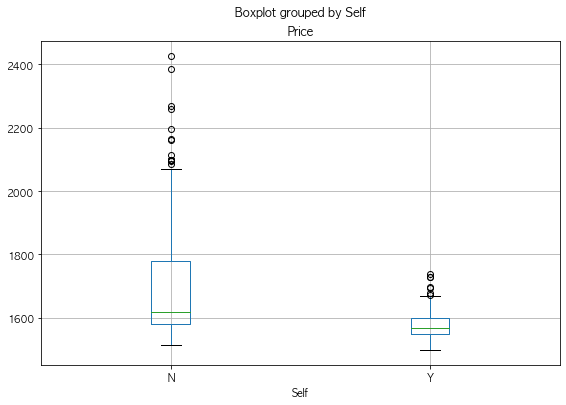

In [80]:
stations.boxplot(column = 'Price', by = 'Self', figsize = (9, 6))

<AxesSubplot:xlabel='Company', ylabel='Price'>

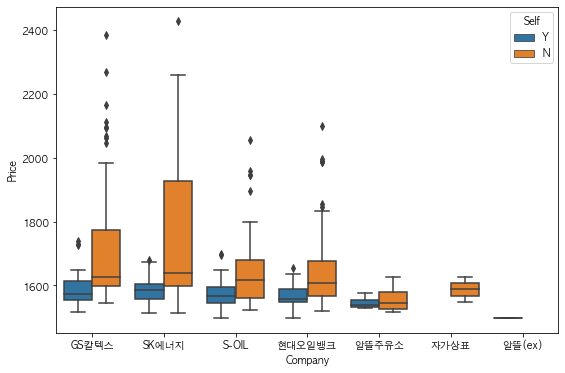

In [12]:
# 상표별 가격 차이
plt.figure(figsize = (9, 6))
sns.boxplot(x = 'Company', y = 'Price', hue = 'Self', data = stations)


### 서울시 구별 가격 차이

In [24]:
import json
import folium
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [25]:
# 비싼 주유소
stations.sort_values(by = 'Price', ascending = False).head(5)

,Name,Address,Price,Self,Company,Restrict
9,서남주유소,서울 중구 통일로 30,2428,N,SK에너지,중구
12,서계주유소,서울 용산구 청파로 367 (서계동),2384,N,GS칼텍스,용산구
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2269,N,GS칼텍스,중구
7,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2259,N,SK에너지,중구
36,뉴서울(강남),서울 강남구 언주로 716,2195,N,SK에너지,강남구


In [26]:
# 싼 주유소
stations.sort_values(by = 'Price').head(5)

,Name,Address,Price,Self,Company,Restrict
0,만남의광장주유소,서울 서초구 양재대로12길 73-71,1498,Y,알뜰(ex),서초구
1,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1499,Y,현대오일뱅크,강북구
0,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1499,Y,S-OIL,강북구
0,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1514,N,SK에너지,양천구
1,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1515,Y,SK에너지,양천구


In [33]:
r_data = stations.groupby(['Restrict'])[['Price']].mean() # stations.groupby('Restrict')['Price'].mean()
r_data

,Price
Restrict,
강남구,1784.486486
강동구,1677.562500
강북구,1533.384615
강서구,1593.242424
관악구,1619.312500
광진구,1596.214286
구로구,1603.318182
금천구,1568.083333
노원구,1613.000000


In [40]:
geo_path = '../Ch.4-Map&PublicAPI/skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path))

In [43]:
map = folium.Map(
        location=[37.5502, 126.982], 
        zoom_start=11, tiles='Stamen Toner'
)
map.choropleth(
    geo_data = geo_data,
    data = r_data.Price,
    columns = [r_data.index, r_data.Price],
    fill_color = 'PuRd',
    key_on = 'feature.id'
)
map